TASK 1

Image loaded successfully.


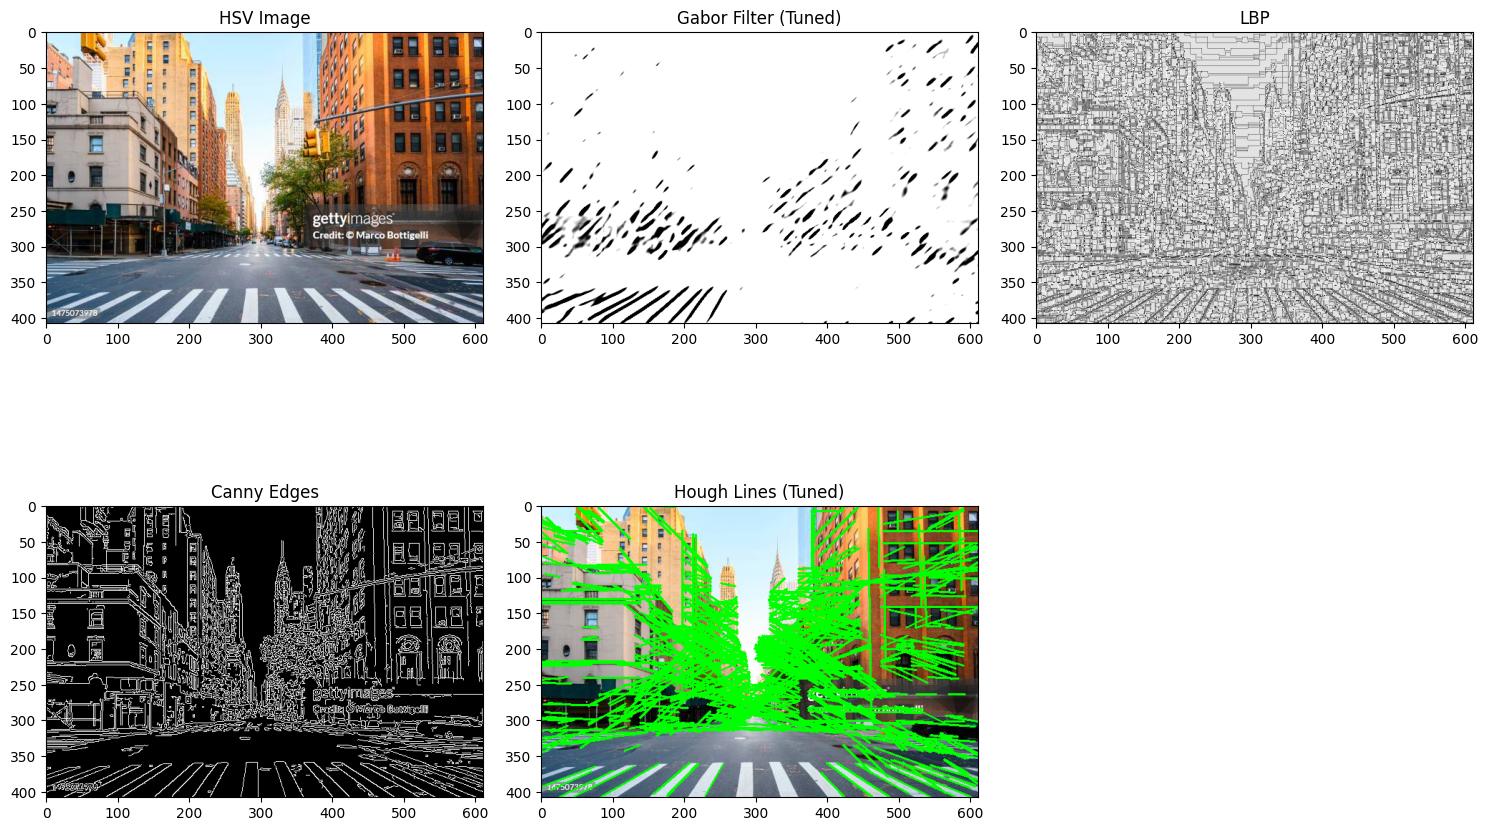

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature

# Load image
image = cv2.imread('/content/street.jpg')
if image is None:
    print("Error: Image not found.")
else:
    print("Image loaded successfully.")

# Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Morphological Operations (to reduce noise)
kernel = np.ones((5,5), np.uint8)
morph_image = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

# Gabor Filter - Tuned Parameters
def apply_gabor(image):
    g_kernel = cv2.getGaborKernel(
        (21, 21),      # Kernel size
        5.0,           # Sigma (smoothness)
        np.pi / 4,     # Theta (orientation)
        10.0,          # Lambda (wavelength)
        0.5,           # Gamma (aspect ratio)
        0,             # Psi (phase offset)
        ktype=cv2.CV_32F
    )
    filtered_img = cv2.filter2D(image, cv2.CV_8UC3, g_kernel)
    return filtered_img

gabor_image = apply_gabor(morph_image)

# LBP for Texture
def extract_lbp(image):
    lbp = feature.local_binary_pattern(image, 8, 1, method='uniform')
    return lbp

lbp_image = extract_lbp(morph_image)

# Edge Detection using Canny
edges = cv2.Canny(gray, 80, 200)

# Hough Transform - Tuned Line Detection
line_image = image.copy()
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=20, maxLineGap=10)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)


# Plot Results
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)), plt.title("HSV Image")
plt.subplot(2, 3, 2), plt.imshow(gabor_image, cmap='gray'), plt.title("Gabor Filter (Tuned)")
plt.subplot(2, 3, 3), plt.imshow(lbp_image, cmap='gray'), plt.title("LBP")
plt.subplot(2, 3, 4), plt.imshow(edges, cmap='gray'), plt.title("Canny Edges")
plt.subplot(2, 3, 5), plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB)), plt.title("Hough Lines (Tuned)")

plt.tight_layout()
plt.show()


Image loaded successfully.


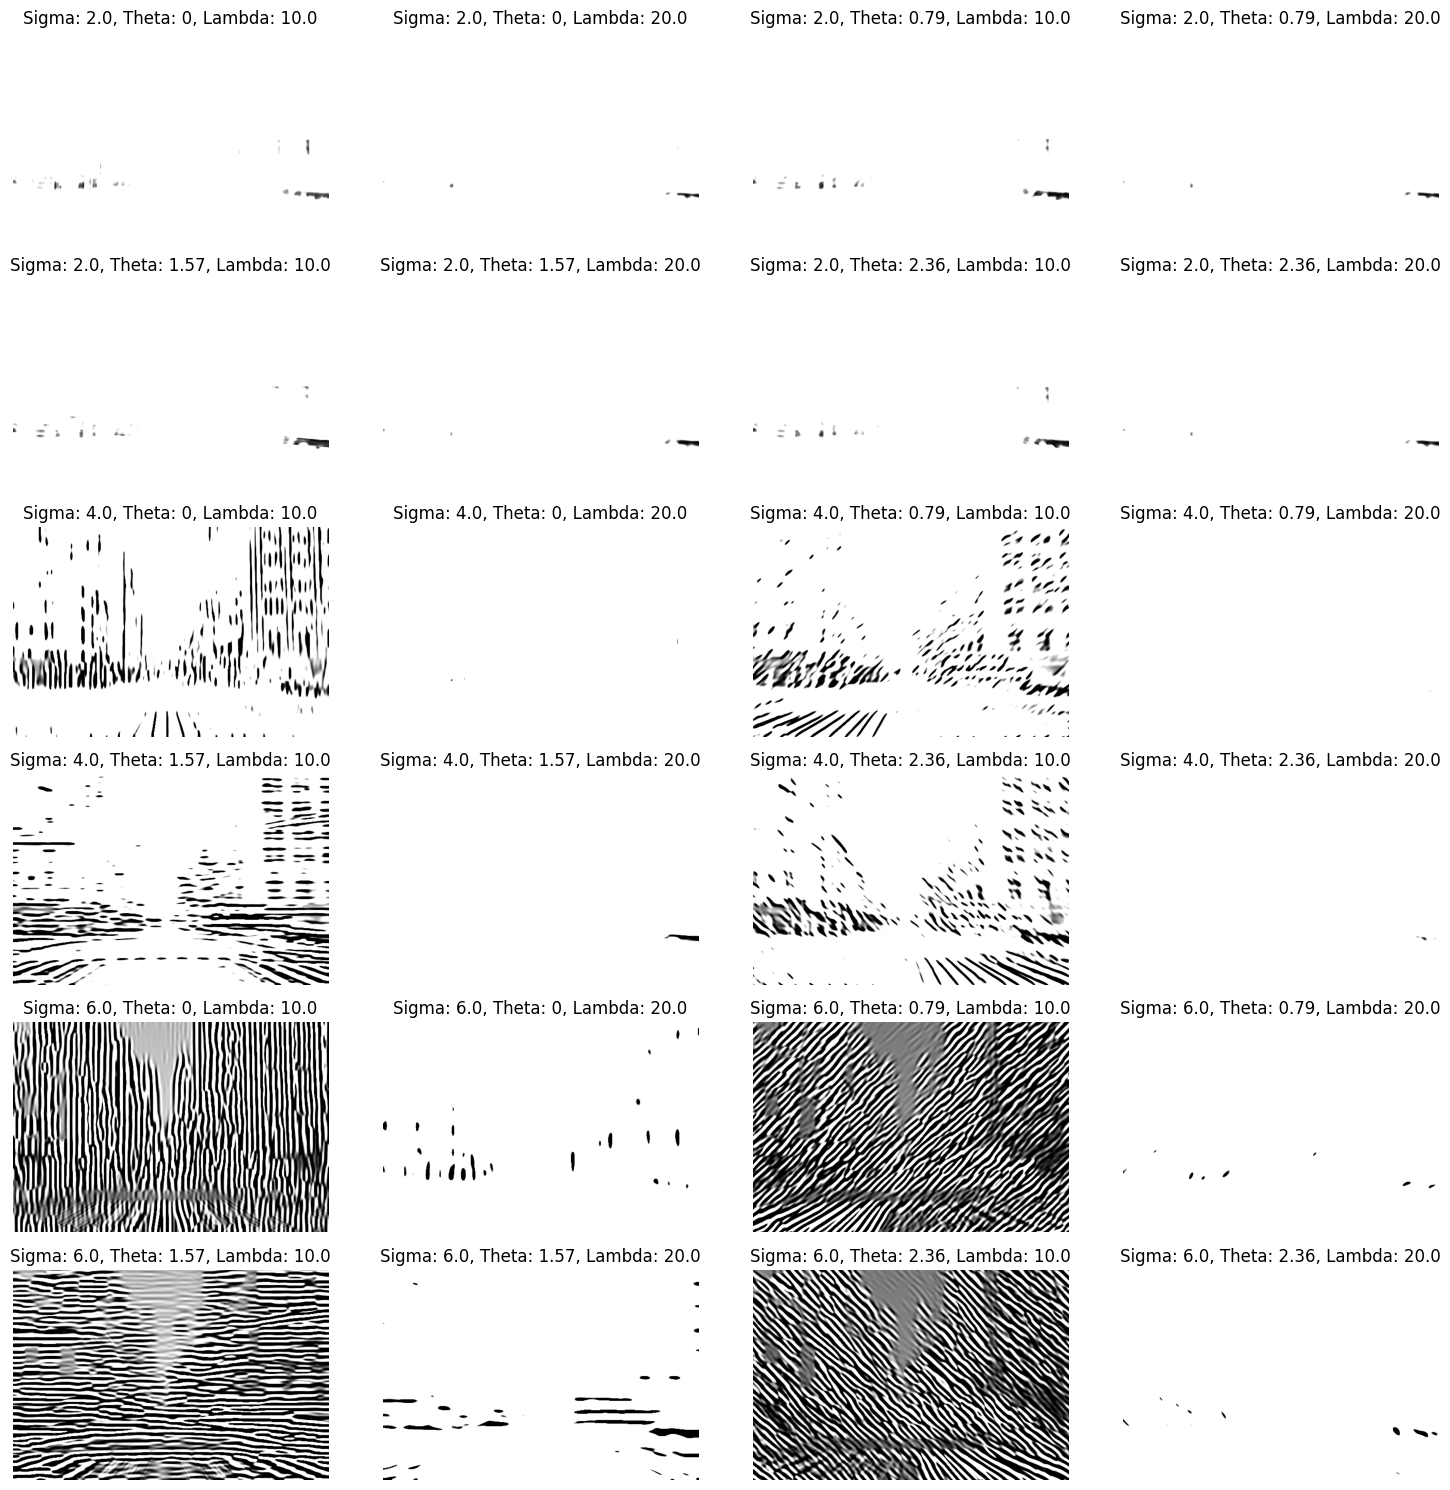

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image
image = cv2.imread('/content/street.jpg')
if image is None:
    print("Error: Image not found.")
else:
    print("Image loaded successfully.")

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Morphological Operations to reduce noise
kernel = np.ones((5,5), np.uint8)
morph_image = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

# Gabor Filter with Multiple Orientations and Frequencies
def apply_gabor_filters(image):
    filtered_images = []
    ksize = 31
    sigmas = [2.0, 4.0, 6.0]  # Different smoothness
    thetas = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]  # Multiple orientations
    lambdas = [10.0, 20.0]  # Different wavelengths
    gamma = 0.7  # Enhanced edge detection
    psi = 0

    for sigma in sigmas:
        for theta in thetas:
            for lamda in lambdas:
                g_kernel = cv2.getGaborKernel(
                    (ksize, ksize), sigma, theta, lamda, gamma, psi, ktype=cv2.CV_32F
                )
                filtered_img = cv2.filter2D(image, cv2.CV_8UC3, g_kernel)
                filtered_images.append((filtered_img, sigma, theta, lamda))

    return filtered_images

gabor_results = apply_gabor_filters(morph_image)

# Plot Results
plt.figure(figsize=(15, 15))
for i, (gabor_image, sigma, theta, lamda) in enumerate(gabor_results):
    plt.subplot(6, 4, i + 1)
    plt.imshow(gabor_image, cmap='gray')
    plt.title(f'Sigma: {sigma}, Theta: {round(theta, 2)}, Lambda: {lamda}')
    plt.axis('off')

plt.tight_layout()
plt.show()


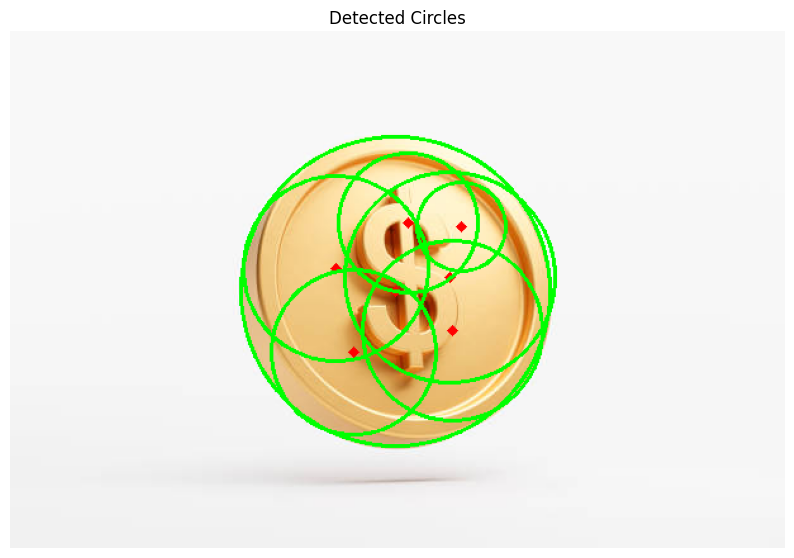

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/coins.jpg', cv2.IMREAD_COLOR)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve circle detection
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Perform Hough Circle Transform with adjusted parameters
circles = cv2.HoughCircles(
    blurred, cv2.HOUGH_GRADIENT, dp=1.5, minDist=40,
    param1=60, param2=35, minRadius=5, maxRadius=150
)

# If circles are detected, draw them
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        x, y, radius = circle
        cv2.circle(image, (x, y), radius, (0, 255, 0), 2)  # Draw circle
        cv2.circle(image, (x, y), 2, (0, 0, 255), 3)       # Draw center

# Display the result using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Detected Circles')
plt.show()


TASK 2

In [ ]:
!pip install opencv-python
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 70.6MB/s]



0: 480x640 1 dog, 480.7ms
Speed: 24.3ms preprocess, 480.7ms inference, 36.6ms postprocess per image at shape (1, 3, 480, 640)


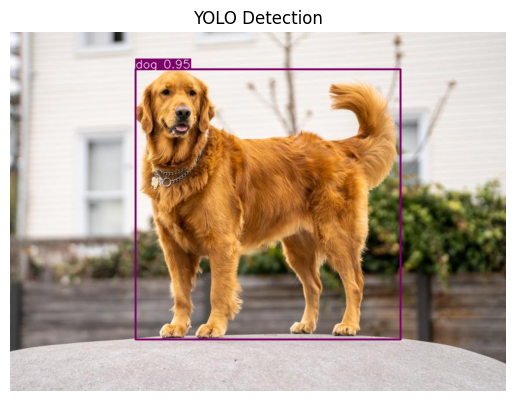

In [ ]:
import cv2
from ultralytics import YOLO

# Load YOLO model (ensure you've installed ultralytics as mentioned)
yolo = YOLO("yolov8n.pt")

# Load an image (update with your image path)
image = cv2.imread("/content/dog image.jpeg")

# Run object detection
results = yolo(image)

# Iterate over each result and display using matplotlib
for result in results:
    annotated_frame = result.plot()  # This draws the detections on the image
    plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
    plt.title("YOLO Detection")
    plt.axis("off")
    plt.show()

In [ ]:
pip install opencv-python tensorflow keras

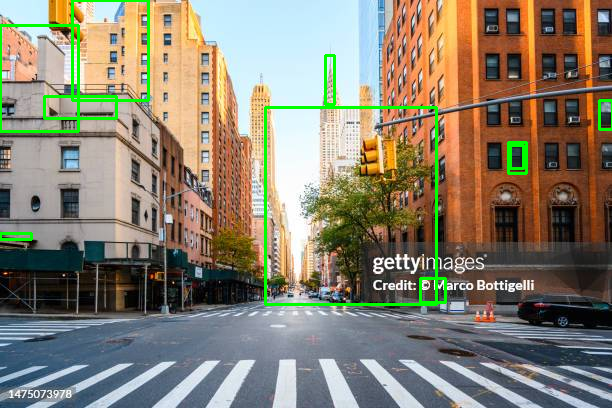

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
def selective_search(image):
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(image)
    ss.switchToSelectiveSearchFast()
    rects = ss.process()
    return rects

image = cv2.imread("/content/street.jpg")
rects = selective_search(image)

for (x, y, w, h) in rects[:10]:  # Show first 10 proposals
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(image)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


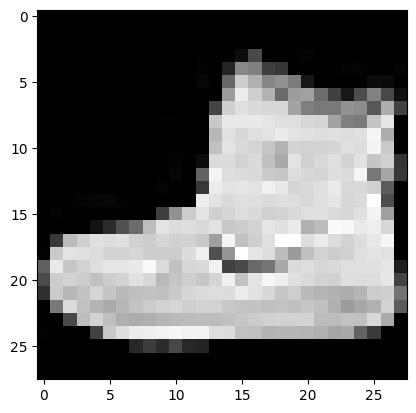

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7751 - loss: 0.6235
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8826 - loss: 0.3170
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9042 - loss: 0.2601
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9187 - loss: 0.2204
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9275 - loss: 0.1960
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9346 - loss: 0.1718
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9456 - loss: 0.1486
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9495 - loss: 0.1344
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9554 - loss: 0.1171
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9622 - loss: 0.1024
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9649 - loss: 0.0934
Epoch 12/50
1875/1875 ━━

In [ ]:
from tensorflow.keras.datasets import fashion_mnist, cifar100
import matplotlib.pyplot as plt

# Load Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Load CIFAR-100
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = cifar100.load_data()

# Show some sample images
plt.imshow(X_train[0], cmap="gray")
plt.show()

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Normalize and add channel dimension
X_train_norm = X_train[..., None] / 255.0
X_test_norm = X_test[..., None] / 255.0

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train_norm, y_train, epochs=50, batch_size=32)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate predictions for the test set
y_pred_prob = model.predict(X_test_norm)
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9072
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.82      0.88      0.85      1000
           3       0.92      0.91      0.91      1000
           4       0.83      0.85      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.79      0.72      0.75      1000
           7       0.95      0.95      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Confusion Matrix:
[[863   2  21  17   6   2  82   0   7   0]
 [  3 978   1   9   2   0   6   0   1   0]
 [ 21   0 878  10  52   0  37   0   2   0]
 [ 18   4  14

In [ ]:
from tensorflow.keras.utils import to_categorical

# Normalize the images to the [0, 1] range
X_train_cifar = X_train_cifar.astype("float32") / 255.0
X_test_cifar = X_test_cifar.astype("float32") / 255.0

# Convert labels to one-hot encoding (for training)
y_train_cifar_cat = to_categorical(y_train_cifar, 100)
y_test_cifar_cat = to_categorical(y_test_cifar, 100)

print("X_train shape:", X_train_cifar.shape)
print("y_train shape:", y_train_cifar_cat.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 100)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(64, (3,3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(128, (3,3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
history = model.fit(X_train_cifar, y_train_cifar_cat, epochs=25, batch_size=64, validation_data=(X_test_cifar, y_test_cifar_cat))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,391,236 (5.31 MB)

 Trainable params: 1,389,316 (5.30 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.0856 - loss: 4.5099 - val_accuracy: 0.2174 - val_loss: 3.2323
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.2394 - loss: 3.1288 - val_accuracy: 0.3459 - val_loss: 2.5941
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.3447 - loss: 2.5568 - val_accuracy: 0.3641 - val_loss: 2.5030
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4021 - loss: 2.2781 - val_accuracy: 0.4192 - val_loss: 2.2090
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4406 - loss: 2.0846 - val_accuracy: 0.4544 - val_loss: 2.0600
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4770 - loss: 1.9372 - val_accuracy: 0.4890 - val_loss: 1.9301
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5093 - loss: 1.7996 - val_accuracy: 0.4849 - val_loss: 1.9324
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5276 - loss: 1.6961 - val_accurac

In [ ]:

# Predict class probabilities on the test set
y_pred_prob = model.predict(X_test_cifar)

# Convert predictions to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y_test_cifar.flatten()  # Flatten in case y_test_cifar is in shape (n,1)

# Calculate overall accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy (sklearn): {accuracy:.4f}")

# Classification Report: precision, recall, F1-score per class
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix: to see misclassifications
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Accuracy (sklearn): 0.5867
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       100
           1       0.77      0.67      0.72       100
           2       0.44      0.47      0.46       100
           3       0.36      0.32      0.34       100
           4       0.33      0.49      0.40       100
           5       0.74      0.57      0.64       100
           6       0.65      0.68      0.66       100
           7       0.67      0.53      0.59       100
           8       0.75      0.73      0.74       100
           9       0.77      0.77      0.77       100
          10       0.49      0.52      0.50       100
          11       0.42      0.39      0.40       100
          12       0.65      0.61      0.63       100
          13       0.60      0.49      0.54       100
          14       0.54      0.55      0.54       100
          15       0.61      0.51      0.56 